# Sales forecasting

## Understand the data very well. Do all transformations / data engineering / etc. wherever applicable

###
* Perform Exploratory Data Analysis (EDA)

* Carry out all the Data mining tasks

* Identify the salient features that will determine the best results

* Perform the model evaluation to select the best algorithms

## Preparing Data for Machine Learning

### Data Preparation

### Loading Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sk learn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

### Loading Data

In [2]:
data=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Understanding data structure

### All columns

In [3]:

data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### structure of dataset

In [4]:
data.shape

(14204, 12)

In [5]:
data.size

170448

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Summary of dataset

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
data.describe(include = 'object').T

,count,unique,top,freq
Item_Identifier,14204,1559,FDU15,10
Item_Fat_Content,14204,2,Low Fat,9185
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,14204,3,Small,7071
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294


### Count of each label in categorical column

In [9]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

#### We have two categories of fat that is low fat and regular fat.

In [10]:
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

#### We have 16 categories of item types.

In [11]:
data.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

#### We have 10 types of outlet .

In [12]:
data.Outlet_Size.value_counts()

Small     7071
Medium    5580
High      1553
Name: Outlet_Size, dtype: int64

#### We have 3 categories of outlet size that is small,medium,high.

In [13]:
data.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

#### We have 3 locations tier1,tier2 and tier 3

In [14]:
data.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

#### We have 4 types of outlet.

In [15]:
data.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

#### We have 9 unique year in which the outlet has beem established and the maximum number of outlet has been established in 1985.

In [16]:
data.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

#### All item outlet sales are unique values .

### Missing Value Treatment

### Checking for null value in each column

In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

#### There is missing values in our item outlet sales which we will use for precdicting the sales of the outlet purpose
.

In [18]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from tabulate import tabulate

In [19]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15:
            categorical.append(column)
            
        else:
            continuous.append(column)
                
    return categorical, continuous

categorical, continuous = sep(data)

table ={"Categorical":categorical, "Continuous":continuous}
print(tabulate(table, headers=["Categorical","continuous"]))

Categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Outlet_Identifier          Item_Weight
Outlet_Establishment_Year  Item_Visibility
Outlet_Size                Item_Type
Outlet_Location_Type       Item_MRP
Outlet_Type                Item_Outlet_Sales


### Performing EDA(Univariate)

In [20]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {data[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {data[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {data[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if data[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [21]:
info_of_cat("Item_Fat_Content")

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


In [22]:
info_of_cat("Item_Type")

Unique values in Item_Type are: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Mode of Item_Type is Fruits and Vegetables
Number of missing values in Item_Type is 0


### EDA(continuous columns)

In [23]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {data[col].mean()}")
    print(f"The median of the {col} is {data[col].median()}")
    print(f"The mode of the {col} is {data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {data[col].std()}")
    print(f"Number of missing values in the {col} is {data[col].isnull().sum()}")

In [24]:
info_of_numerical("Item_MRP")

The mean of the Item_MRP is 141.00497725992656
The median of the Item_MRP is 142.247
The mode of the Item_MRP is 172.0422
The standard deviation of the Item_MRP is 62.086938014763994
Number of missing values in the Item_MRP is 0


In [25]:
print(continuous)
info_of_numerical("Item_Visibility")

['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Item_Outlet_Sales']
The mean of the Item_Visibility is 0.07030079341671354
The median of the Item_Visibility is 0.062347052
The mode of the Item_Visibility is 0.06470883
The standard deviation of the Item_Visibility is 0.048621198376929964
Number of missing values in the Item_Visibility is 0


## Feature Engineering

In [26]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15:
            categorical.append(column)
            
        else:
            continuous.append(column)
                
    return categorical, continuous

categorical, continuous = sep(data)

table ={"Categorical":categorical, "Continuous":continuous}
print(tabulate(table, headers=["Categorical","continuous"]))

Categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Outlet_Identifier          Item_Weight
Outlet_Establishment_Year  Item_Visibility
Outlet_Size                Item_Type
Outlet_Location_Type       Item_MRP
Outlet_Type                Item_Outlet_Sales


###  Histogram of all numerical features


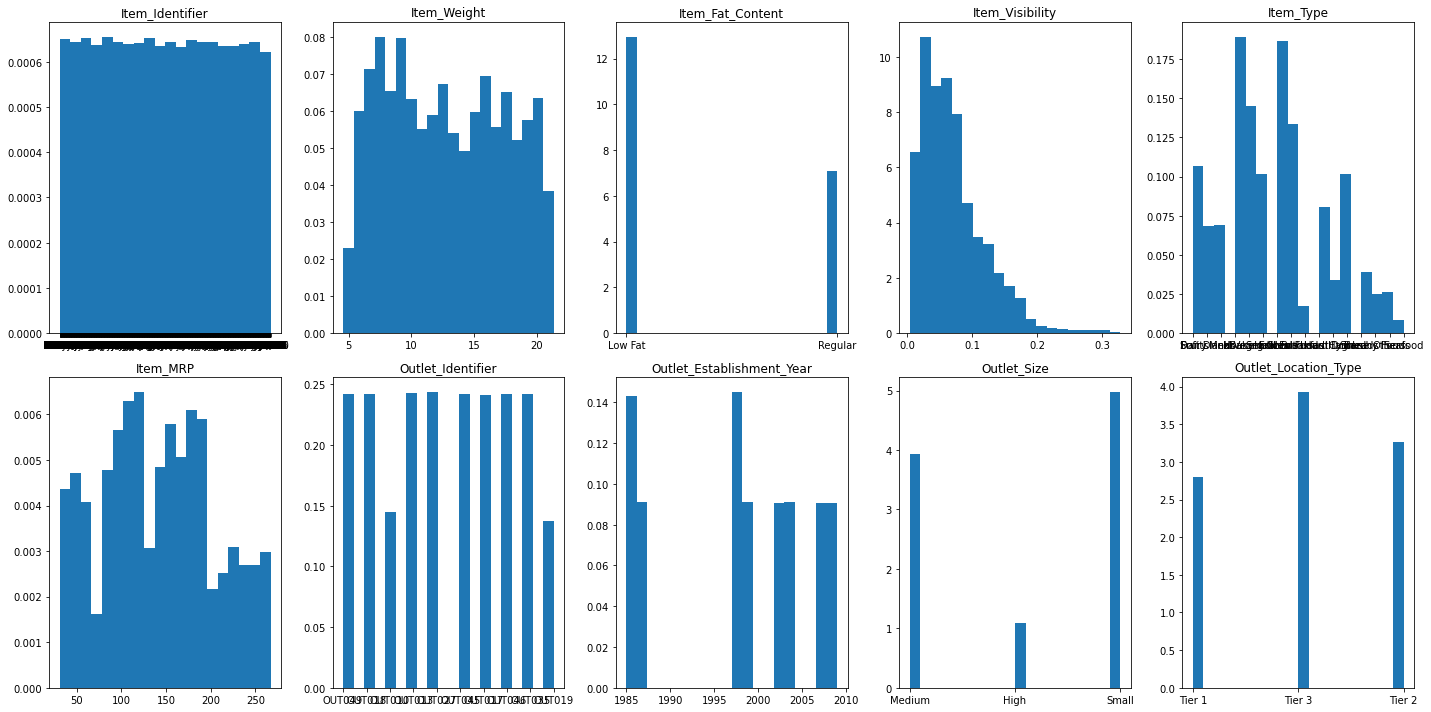

In [27]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = data.select_dtypes(include=numerics)
numeric_cols=data.columns
num_cols=5
n_bins = 20

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(data[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

## Using Label Encoder technique to convert categorical column into numerical type

In [28]:
label_encoder=preprocessing.LabelEncoder()

In [29]:
data['Item_Fat_Content_encode']= label_encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Fat_Content_encode'].unique()


array([0, 1])

In [30]:
data['Outlet_Identifier_encode']= label_encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Identifier_encode'].unique()


array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [31]:
data['Outlet_Establishment_Year_encode']= label_encoder.fit_transform(data['Outlet_Establishment_Year'])
data['Outlet_Establishment_Year_encode'].unique()

array([4, 8, 3, 1, 0, 5, 7, 2, 6], dtype=int64)

In [32]:
data['Outlet_Size_Year_encode']= label_encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Size_Year_encode'].unique()

array([1, 0, 2])

In [33]:
data['Outlet_Location_Type_encode']= label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Location_Type_encode'].unique()

array([0, 2, 1])

In [34]:
data['Outlet_Type_encode']= label_encoder.fit_transform(data['Outlet_Type'])
data['Outlet_Type_encode'].unique()

array([1, 2, 0, 3])

## Data Visualization

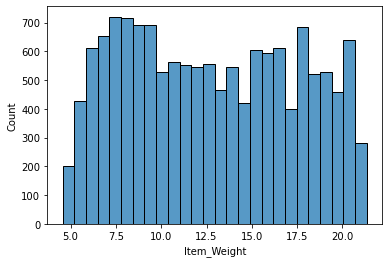

In [35]:

sns.histplot(x='Item_Weight', data=data);
 

#### Most item weight is in between 6 to 10.

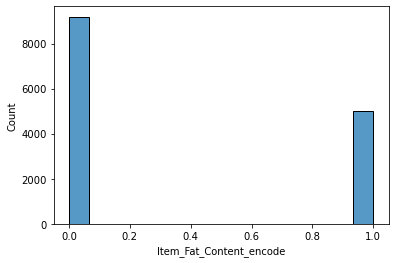

In [36]:
sns.histplot(x='Item_Fat_Content_encode', data=data);

#### The low fat which is encoded by 0 has the count almost 9000 and in percent it is equivalent to 65%

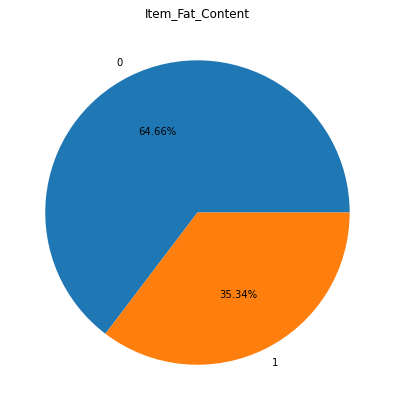

In [37]:
plt.figure(figsize = (15,7))
x = data["Item_Fat_Content_encode"].value_counts()
y = data["Item_Fat_Content_encode"].value_counts().index
plt.pie(x,labels = y, autopct = "%.2f%%")
plt.title("Item_Fat_Content")
plt.show()

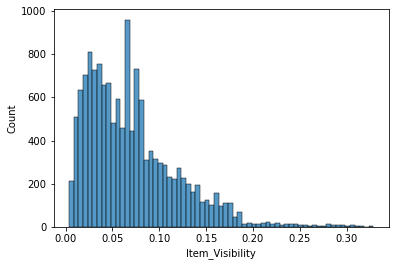

In [38]:

sns.histplot(x='Item_Visibility', data=data);

#### The highest item visibility is between 0.5 to1.0

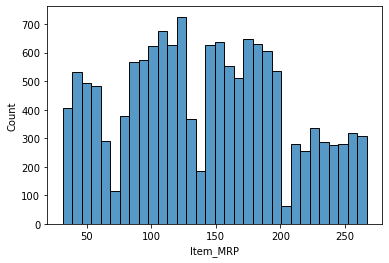

In [39]:

sns.histplot(x='Item_MRP', data=data);

#### The most of the item mrp price  is between 75 to 200

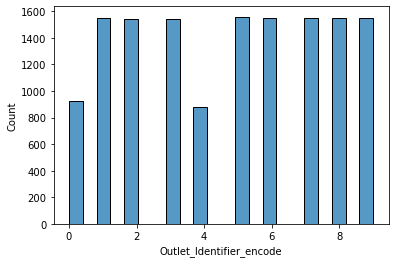

In [40]:

sns.histplot(x='Outlet_Identifier_encode', data=data);

#### This is the graph for different outlet 

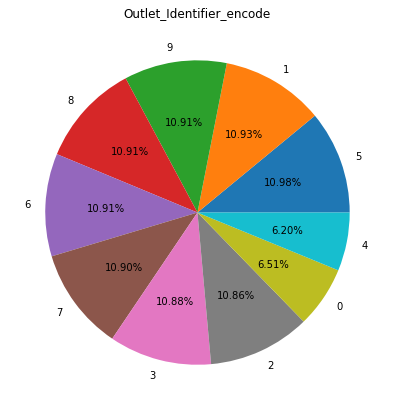

In [41]:
plt.figure(figsize = (15,7))
x = data["Outlet_Identifier_encode"].value_counts()
y = data["Outlet_Identifier_encode"].value_counts().index
plt.pie(x,labels = y, autopct = "%.2f%%")
plt.title("Outlet_Identifier_encode")
plt.show()

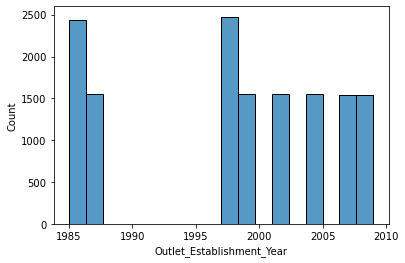

In [42]:

sns.histplot(x='Outlet_Establishment_Year', data=data);

#### Most of the outlet has been established between 1985 to 1997

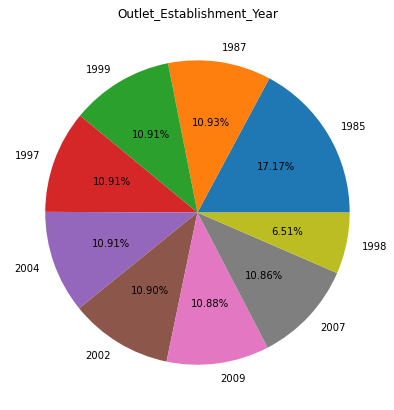

In [43]:
plt.figure(figsize = (15,7))
x = data["Outlet_Establishment_Year"].value_counts()
y = data["Outlet_Establishment_Year"].value_counts().index
plt.pie(x,labels = y, autopct = "%.2f%%")
plt.title("Outlet_Establishment_Year")
plt.show()

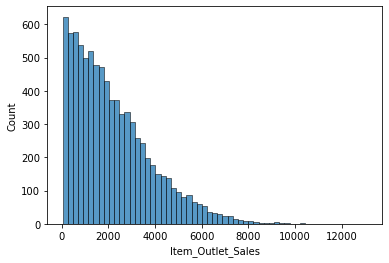

In [44]:

sns.histplot(x='Item_Outlet_Sales', data=data);

#### The maximum sales has been done in the range of 0 to 2000

### Histogram of all numerical features

### EDA(Exploratory data analysis)

### Distribution of Item MRP

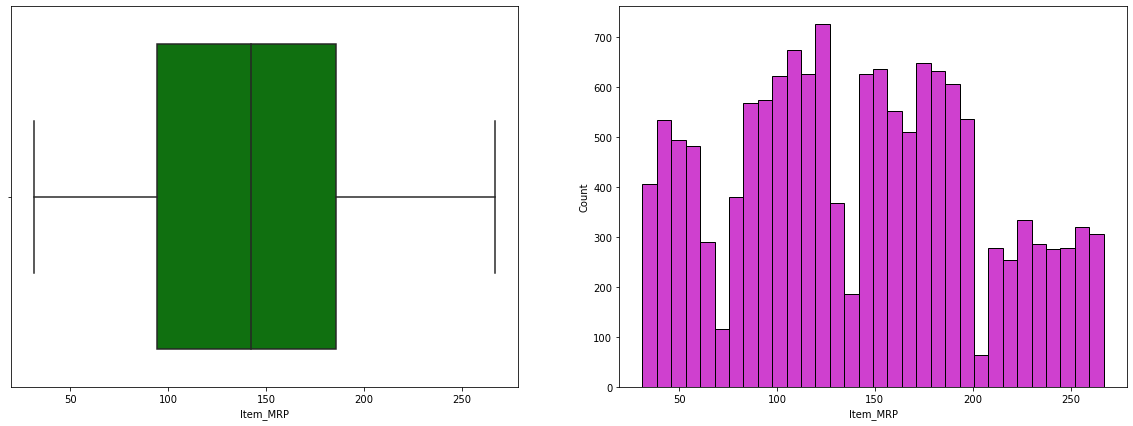

In [45]:

fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = data["Item_MRP"], ax =ax[1], color = "m") 
sns.boxplot(x = data["Item_MRP"], ax = ax[0], color = "g") 
plt.show()

#### The average price of the item is 140 rs

### Distribution of outlet establishment year

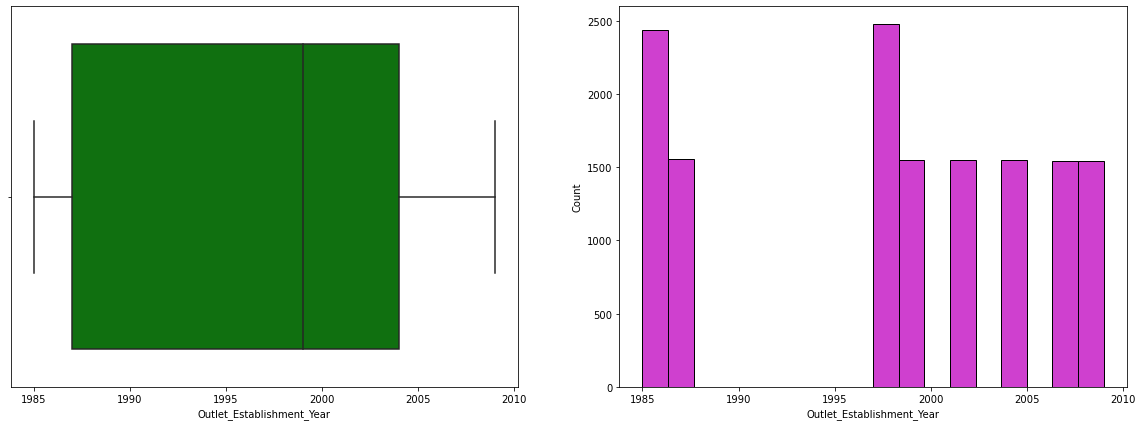

In [46]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = data["Outlet_Establishment_Year"], ax =ax[1], color = "m") 
sns.boxplot(x = data["Outlet_Establishment_Year"], ax = ax[0], color = "g") 
plt.show()

#### Most of the outlet is opened between 1987 to 1997

### Feature Scaling

In [47]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_encode',
       'Outlet_Identifier_encode', 'Outlet_Establishment_Year_encode',
       'Outlet_Size_Year_encode', 'Outlet_Location_Type_encode',
       'Outlet_Type_encode'],
      dtype='object')

### Defining method to perform data scaling operation based on the type of scaling

In [48]:
# Defining method to perform data scaling operation based on the type of scaling

def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_data = data.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_data.to_numpy()),columns=new_data.columns)
    return df_scaled

### scaling the data using MinMax Scaling process

In [49]:
scale = 'minmax' #standard
df_scaled=feature_scale(scale)
df_scaled


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_encode,Outlet_Identifier_encode,Outlet_Establishment_Year_encode,Outlet_Size_Year_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,0.282525,0.038399,0.927507,0.583333,0.283587,0.0,1.000000,0.500,0.5,0.0,0.333333
1,0.081274,0.048346,0.072068,1.000000,0.031419,1.0,0.333333,1.000,0.5,1.0,0.666667
2,0.770765,0.040593,0.468288,0.583333,0.158115,0.0,1.000000,0.500,0.5,0.0,0.333333
3,0.871986,0.218055,0.640093,0.541667,0.053555,1.0,0.000000,0.375,0.5,1.0,0.000000
4,0.260494,0.186950,0.095805,0.083333,0.073651,0.0,0.111111,0.125,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,0.030546,0.467004,0.500000,NaN,1.0,0.888889,0.250,1.0,0.0,0.333333
14200,0.181304,0.429216,0.585126,1.000000,NaN,1.0,0.333333,1.000,0.5,1.0,0.666667
14201,0.324204,0.215364,0.371199,0.708333,NaN,0.0,0.777778,0.625,1.0,0.5,0.333333
14202,0.639774,0.188211,0.778154,0.916667,NaN,1.0,0.222222,0.875,1.0,0.5,0.333333


## Feature Selection

In [50]:
# Finding correlation among numerical features, based on their strong relation we can choose the import

corr=df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_encode,Outlet_Identifier_encode,Outlet_Establishment_Year_encode,Outlet_Size_Year_encode,Outlet_Location_Type_encode,Outlet_Type_encode
Item_Weight,1.000000,-0.020472,0.035751,0.000247,0.013261,-0.033737,0.003002,0.000301,0.000944,-0.001719,0.001913
Item_Visibility,-0.020472,1.000000,-0.009144,-0.090833,-0.135247,0.048315,-0.108731,-0.100123,0.026808,-0.020550,-0.172744
Item_MRP,0.035751,-0.009144,1.000000,0.000141,0.567574,-0.004019,-0.000555,0.000302,-0.001305,0.000838,0.000136
Outlet_Establishment_Year,0.000247,-0.090833,0.000141,1.000000,-0.049135,0.000137,0.079047,0.970787,0.428387,-0.089328,-0.122519
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000,0.018719,0.162325,-0.025525,-0.060517,0.089367,0.401522
Item_Fat_Content_encode,-0.033737,0.048315,-0.004019,0.000137,0.018719,1.000000,-0.001095,0.000142,-0.000827,0.001373,-0.000228
Outlet_Identifier_encode,0.003002,-0.108731,-0.000555,0.079047,0.162325,-0.001095,1.000000,-0.030948,0.423623,-0.716151,0.099899
Outlet_Establishment_Year_encode,0.000301,-0.100123,0.000302,0.970787,-0.025525,0.000142,-0.030948,1.000000,0.323491,0.041889,-0.040255
Outlet_Size_Year_encode,0.000944,0.026808,-0.001305,0.428387,-0.060517,-0.000827,0.423623,0.323491,1.000000,-0.590677,-0.260496
Outlet_Location_Type_encode,-0.001719,-0.020550,0.000838,-0.089328,0.089367,0.001373,-0.716151,0.041889,-0.590677,1.000000,0.467251


### Correlation Heatmap

<AxesSubplot:>

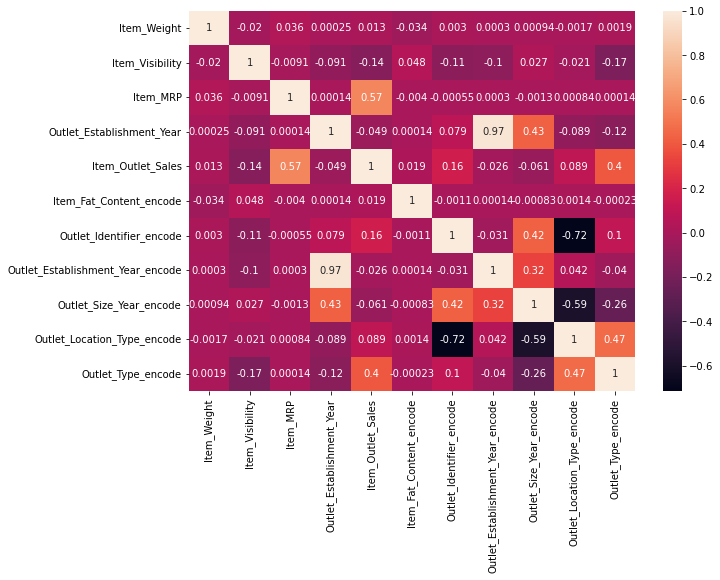

In [51]:
plt.figure(figsize=(10,7)) 
sns.heatmap(df_scaled.corr(),annot=True)

### SPLITTING THE DATA

In [52]:
train=df_scaled[~df_scaled['Item_Outlet_Sales'].isnull()]

In [53]:
test=df_scaled[df_scaled['Item_Outlet_Sales'].isnull()]

In [54]:
X_train=train.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_train=train['Item_Outlet_Sales']

### Creating  the regression model

In [55]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(X_train,y_train)

LinearRegression()

In [56]:
c_r_sq=reg.score(X_train, y_train)
print('coefficient of determination:', c_r_sq)

coefficient of determination: 0.5014022094437659


### Intercept

In [57]:
reg.intercept_   #intercept=the expected mean value of Y when all X=0.

-0.057653827537268054

### Obtain the (coefficients) of the regression

In [58]:
reg.coef_

array([ 0.28073966,  0.04846639,  0.1880006 , -0.0447818 ])

### Testing the model

In [63]:
X_test=test.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_test=test['Item_Outlet_Sales']

In [66]:
y_hat_test = reg.predict(X_train)

In [67]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,1.366357
1,1.107276
2,1.200969
3,1.118827
4,1.029345


In [68]:
y_train.shape

(8523,)

In [69]:
rf_score=reg.score(X_train,y_train)
rf_rmse=np.sqrt(mean_squared_error(y_train,y_hat_test))
print(rf_score)
print(rf_rmse) # lower values of rmse is good.RMSE is a good measure of how accurately the model predicts the response. 
            # (Root Mean Square Error)

0.5014022094437659
0.09230454827131684


## Build Random Forest Model

#### A Random Forest Algorithm is a supervised machine learning algorithm which is extremely popular and is used for Classification and Regression problems in Machine Learning. We know that a forest comprises numerous trees, and the more trees more it will be robust.

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [71]:
X_train=train.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_train=train['Item_Outlet_Sales']

In [72]:
forest=RandomForestRegressor(n_estimators=100,criterion='squared_error',random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [73]:
X_test=test.loc[:,('Item_MRP','Outlet_Identifier_encode','Outlet_Type_encode','Item_Visibility')]
y_test=test['Item_Outlet_Sales']

In [74]:
y_pred_test=forest.predict(X_test)
y_pred_test

array([0.13560288, 0.07530654, 0.03573447, ..., 0.13563348, 0.26190656,
       0.12205294])

## Hyperparameter tuning for Random Forest using GridSearchCV and fit the data


#### It can give you optimized values for hyperparameters, which maximizes your model's predictive accuracy.


In [75]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1) #n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.

In [76]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]}

In [77]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")

In [78]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 5.81 s
Wall time: 2min 24s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [79]:
grid_search.best_score_

0.5963401498843797

In [80]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=20, min_samples_leaf=50, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [81]:
y_hat_test3 = forest.predict(X_train)


rf_score=forest.score(X_train,y_train)
rf_rmse=np.sqrt(mean_squared_error(y_train,y_hat_test3))
print(rf_score)
print(rf_rmse)

0.9365054604707365
0.032939432711107684


## Building Decision Tree Regressor

####  The Root Node is the initial node which represents the entire sample and may get split further into further nodes.

In [82]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

R-Squared on train dataset=0.5843936981220916


In [83]:
y_hat_test2 = dtm.predict(X_train)

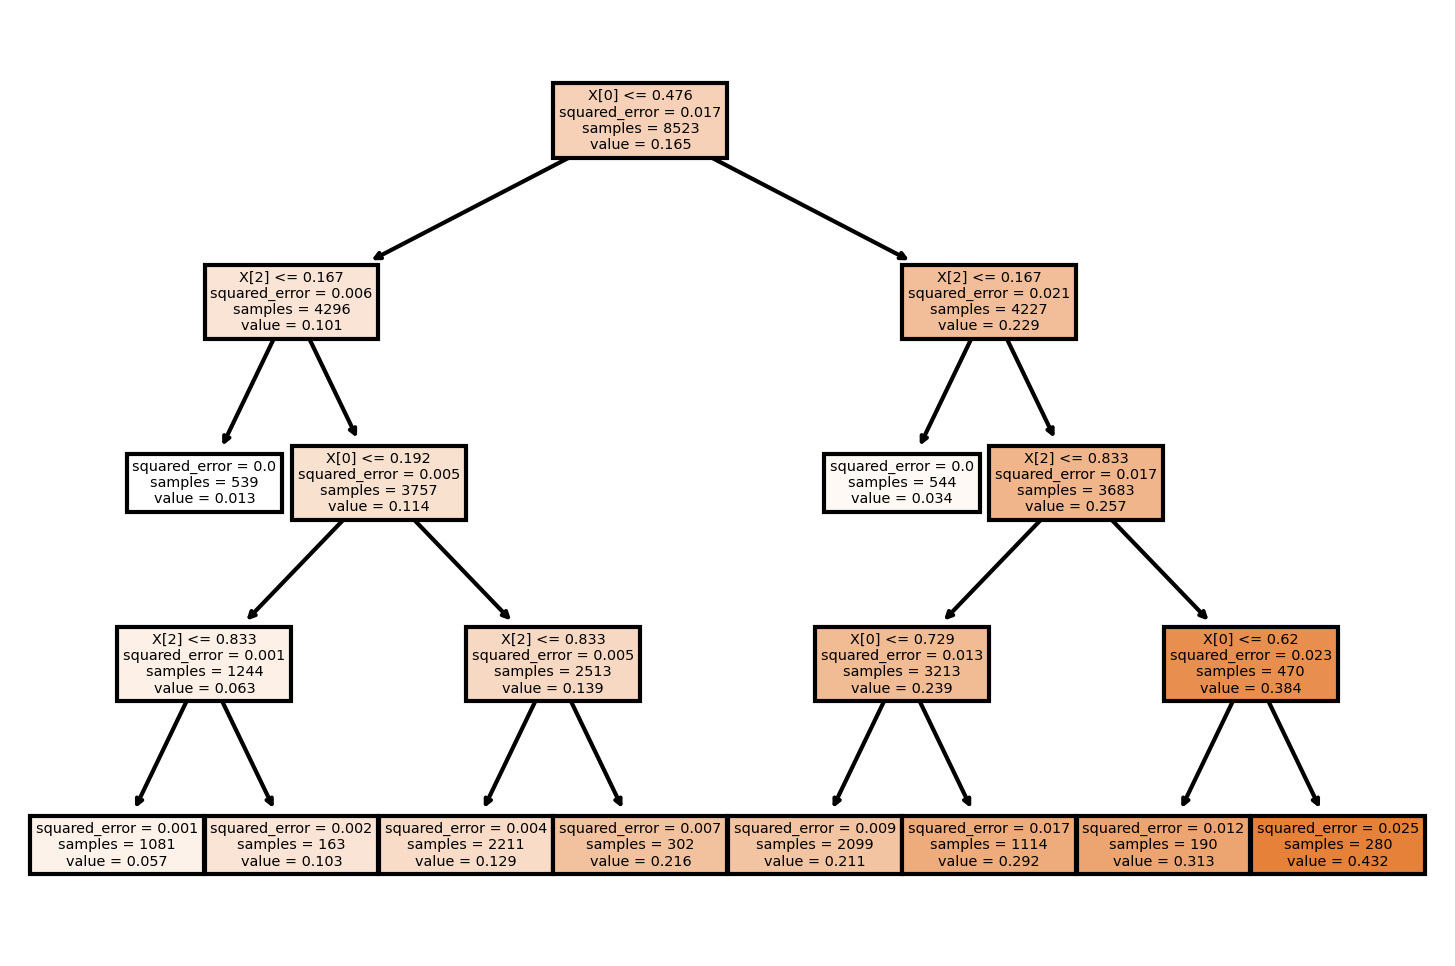

In [84]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

#save figure in current directory as png
fig.savefig('Bike_regression_decisiontree.png')

## Testing of decision tree

In [85]:
y_dec_test = dtm.predict(X_test)

In [86]:
X_test.size

22724

In [87]:
df_pf = pd.DataFrame(np.exp(y_dec_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,1.137603
1,1.137603
2,1.034124
3,1.234727
4,1.539944


In [88]:
rf_score=dtm.score(X_train,y_train)
rf_rmse2=np.sqrt(mean_squared_error(y_train,y_hat_test2))
print(rf_score)
print(rf_rmse2)

0.5843936981220916
0.08427310362699672


## Conclusion:

###  Root Mean Square Error (one of the most commonly used measures for evaluating the quality of predictions).
* RMSE for linear regression=0.09236693380721986

*  RMSE for Random Forest Model=0.0328844682884098

* RMSE for decision tree =0.08427310362699673

#### Model which is having lowest RMSE is considered as best model so for prediction we will use  Random Forest Model